In [3]:
!tar -xvf dataset.tar

dataset/
dataset/dataset/
dataset/dataset/Bluebell/
dataset/dataset/Bluebell/image_0241.jpg
dataset/dataset/Bluebell/image_0242.jpg
dataset/dataset/Bluebell/image_0243.jpg
dataset/dataset/Bluebell/image_0244.jpg
dataset/dataset/Bluebell/image_0245.jpg
dataset/dataset/Bluebell/image_0246.jpg
dataset/dataset/Bluebell/image_0247.jpg
dataset/dataset/Bluebell/image_0248.jpg
dataset/dataset/Bluebell/image_0249.jpg
dataset/dataset/Bluebell/image_0250.jpg
dataset/dataset/Bluebell/image_0251.jpg
dataset/dataset/Bluebell/image_0252.jpg
dataset/dataset/Bluebell/image_0253.jpg
dataset/dataset/Bluebell/image_0254.jpg
dataset/dataset/Bluebell/image_0255.jpg
dataset/dataset/Bluebell/image_0256.jpg
dataset/dataset/Bluebell/image_0257.jpg
dataset/dataset/Bluebell/image_0258.jpg
dataset/dataset/Bluebell/image_0259.jpg
dataset/dataset/Bluebell/image_0260.jpg
dataset/dataset/Bluebell/image_0261.jpg
dataset/dataset/Bluebell/image_0262.jpg
dataset/dataset/Bluebell/image_0263.jpg
dataset/dataset/Bluebell/ima

In [4]:
from fastai.vision.all import *

In [5]:
path = Path("./dataset")
print("Klasör yapısı:")
print(path.ls())

# İlk birkaç sınıf klasörünü kontrol et
for class_dir in path.ls()[:5]:
    print(f"{class_dir.name}: {len(get_image_files(class_dir))} görsel")

Klasör yapısı:
[Path('dataset/dataset')]
dataset: 1360 görsel


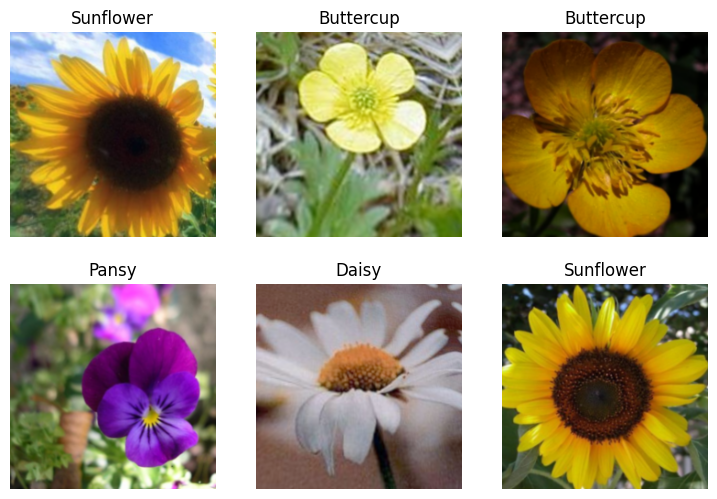

In [6]:
flower_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y = parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dls = flower_block.dataloaders(path)
dls.show_batch(max_n=6)

In [8]:
print("Classes:", dls.vocab)
print("Number of flower classes:", len(dls.vocab))

Classes: ['Bluebell', 'Buttercup', "Colts'Foot", 'Cowslip', 'Crocus', 'Daffodil', 'Daisy', 'Dandelion', 'Fritillary', 'Iris', 'Lily Valley', 'Pansy', 'Snowdrop', 'Sunflower', 'Tigerlily', 'Tulip', 'Windflower']
Number of flower classes: 17


In [9]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.865993,0.596529,0.801471,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.639586,0.333967,0.889706,00:03
1,0.410752,0.217884,0.933824,00:03
2,0.274045,0.137825,0.955882,00:03
3,0.190596,0.134825,0.955882,00:03
4,0.141603,0.130271,0.952206,00:03


SuggestedLRs(valley=6.30957365501672e-05)

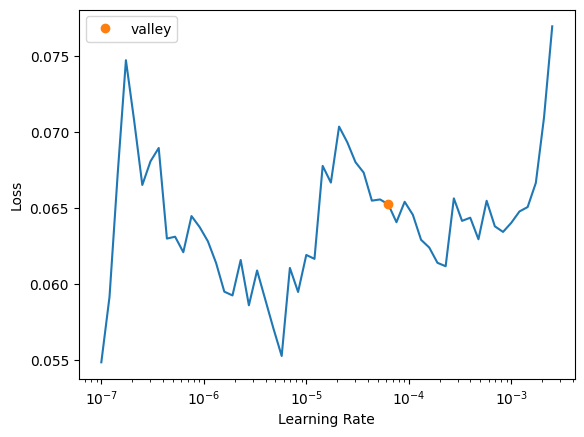

In [22]:
learn.lr_find()

In [23]:
base_lr = 6.30957365501672e-05

In [24]:
learn.fine_tune(5, base_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.056813,0.153966,0.948529,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.049213,0.153503,0.948529,00:03
1,0.053384,0.142757,0.948529,00:03
2,0.059491,0.145888,0.952206,00:03
3,0.052079,0.144066,0.948529,00:03
4,0.051712,0.150940,0.948529,00:03


In [25]:
learn.fine_tune(5, base_lr * 10)

epoch,train_loss,valid_loss,accuracy,time
0,0.046208,0.144606,0.955882,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.048054,0.139099,0.963235,00:03
1,0.041173,0.142170,0.952206,00:03
2,0.038306,0.121441,0.959559,00:03
3,0.031873,0.131106,0.963235,00:03
4,0.027665,0.130627,0.959559,00:03


In [26]:
learn.fine_tune(5, base_lr * 25)

epoch,train_loss,valid_loss,accuracy,time
0,0.019301,0.106793,0.966912,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.018974,0.090682,0.970588,00:03
1,0.018327,0.159202,0.948529,00:03
2,0.026788,0.281776,0.944853,00:03
3,0.025895,0.143087,0.966912,00:03
4,0.022558,0.138027,0.963235,00:03


In [30]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.freeze()
learn.fit_one_cycle(1)

learn.unfreeze()
learn.fit_one_cycle(3, lr_max=slice(base_lr, base_lr * 25))

epoch,train_loss,valid_loss,accuracy,time
0,2.557808,1.049413,0.683824,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.834410,0.548204,0.860294,00:03
1,0.445506,0.183170,0.966912,00:03
2,0.277689,0.153237,0.970588,00:03


In [61]:
learn.export('flower_classifier.pkl')

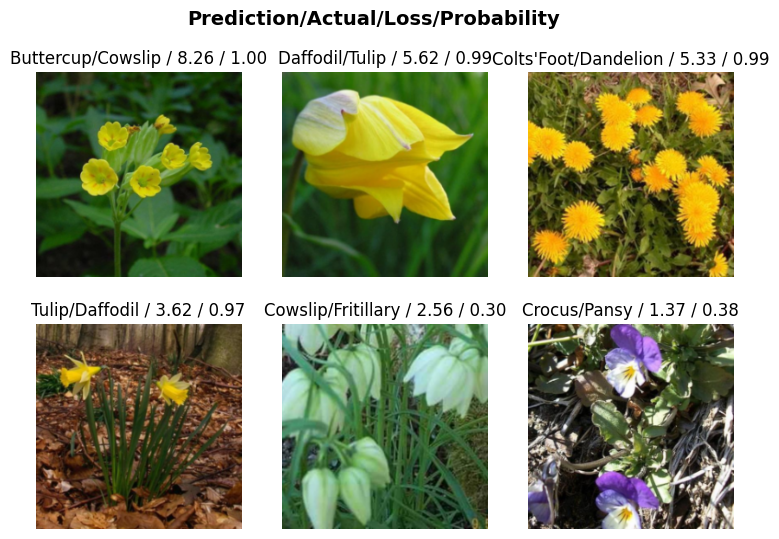

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(6, nrows=2)

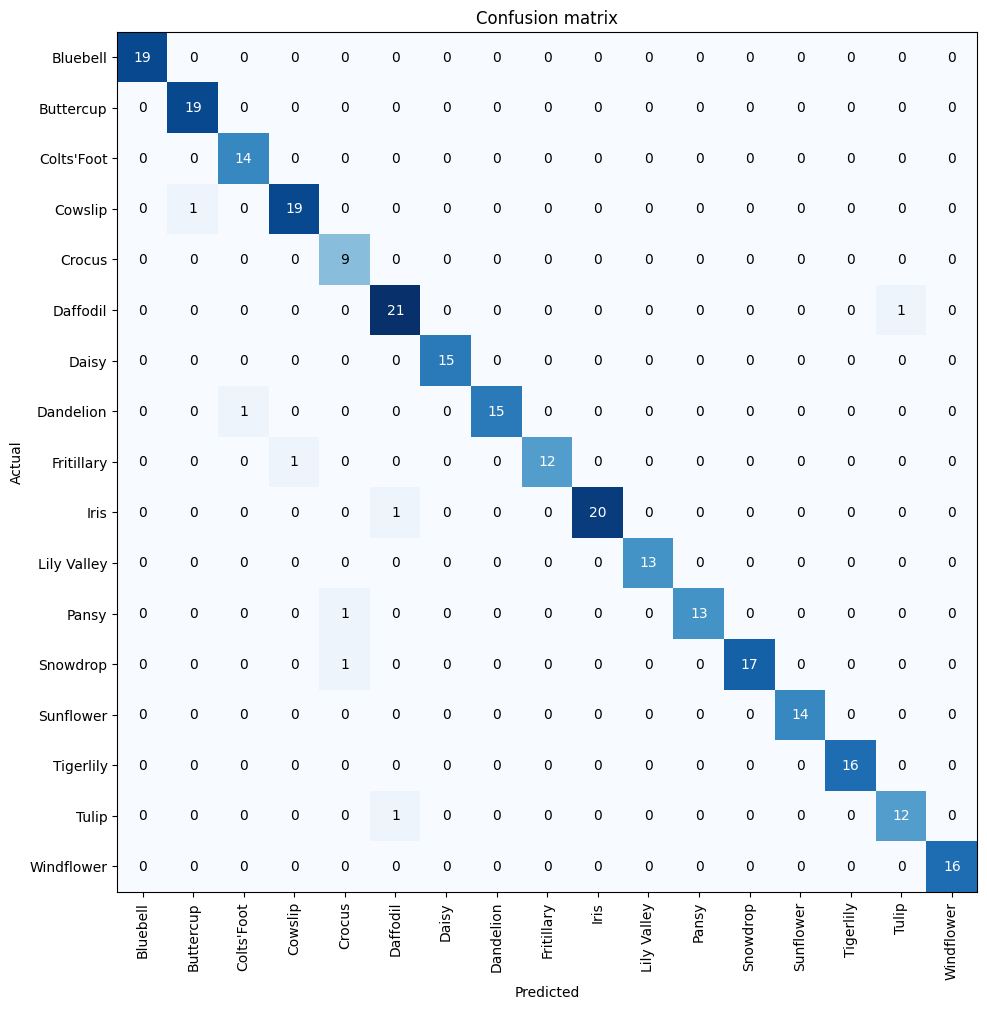

In [34]:
interp.plot_confusion_matrix(figsize=(10,10))